# Airbnb-Price-Prdeictions-Florida-Edition

## Summary
This notebook focuses on time series analysis and feature scaling for Airbnb listings. The dataset contains information about various properties listed on Airbnb, including their location, amenities, pricing, and host details. The goal of this analysis is to extract insights from the time-based features and preprocess the data by scaling the numeric features and encoding the categorical features. This preprocessing step prepares the data for further analysis or modeling tasks.

---

# Table of Contents

1. [Imports](#Imports)
2. [Time Series Analysis](#Time-Series-Analysis)

---



## Imports

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import re
import nltk
from collections import Counter
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [26]:
# Load the cleaned dataset
listings_cleaned = pd.read_csv('../data/cleaned_listings.csv')

## Time Series Analysis

In [12]:
# Convert the 'last_review' column to datetime format
listings_cleaned['last_review'] = pd.to_datetime(listings_cleaned['last_review'])

In [13]:
# Extract year, month, and day of the week as new features
listings_cleaned['year'] = listings_cleaned['last_review'].dt.year
listings_cleaned['month'] = listings_cleaned['last_review'].dt.month
listings_cleaned['day_of_week'] = listings_cleaned['last_review'].dt.dayofweek


In [14]:
# Drop rows with missing values in the 'year' column
listings_cleaned = listings_cleaned.dropna(subset=['year']).copy()

In [15]:
# Convert the 'year' column to integer type
listings_cleaned.loc[:, 'year'] = listings_cleaned['year'].astype(int)

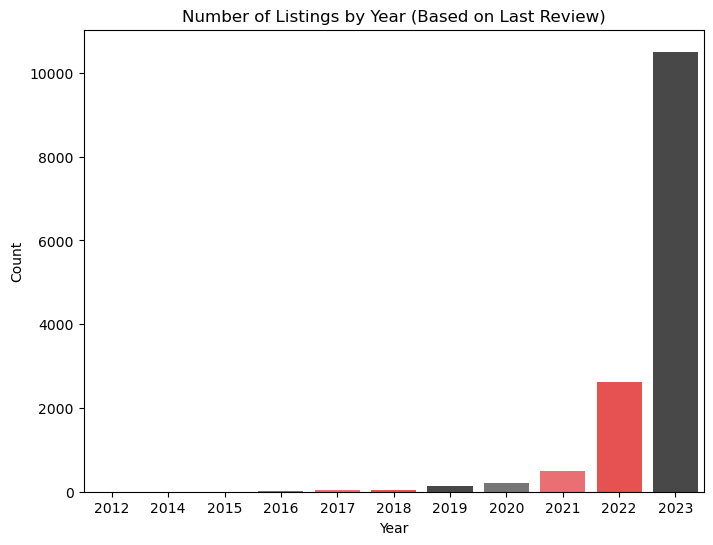

In [21]:
airbnb_colors = ['#FF5A5F', '#FF3839', '#484848', '#767676']

# Counts of listings by year
plt.figure(figsize=(8, 6))
sns.countplot(x='year', data=listings_cleaned, palette=airbnb_colors)
plt.title('Number of Listings by Year (Based on Last Review)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


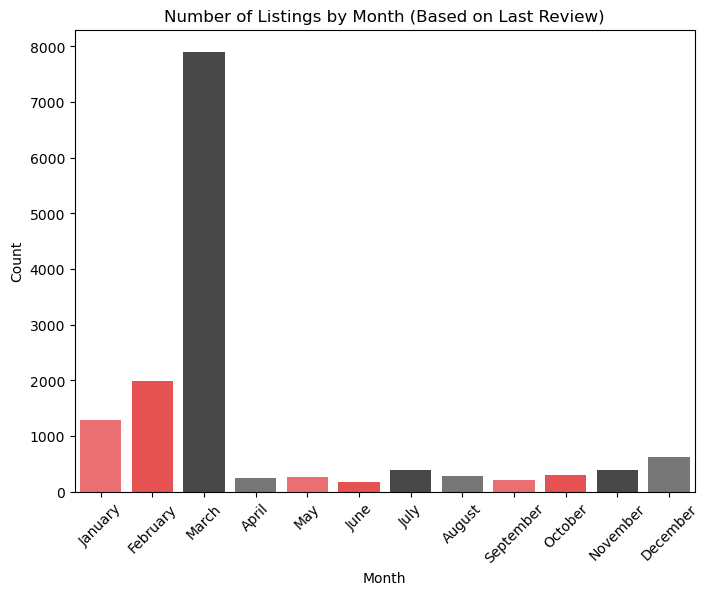

In [23]:
airbnb_colors = ['#FF5A5F', '#FF3839', '#484848', '#767676']

# Counts of listings by month
plt.figure(figsize=(8, 6))
sns.countplot(x='month', data=listings_cleaned, palette=airbnb_colors)
plt.title('Number of Listings by Month (Based on Last Review)')
plt.xlabel('Month')
plt.ylabel('Count')

# Month numbers to month names
month_labels = [calendar.month_name[i] for i in range(1, 13)]
plt.xticks(ticks=range(12), labels=month_labels, rotation=45)

plt.show()



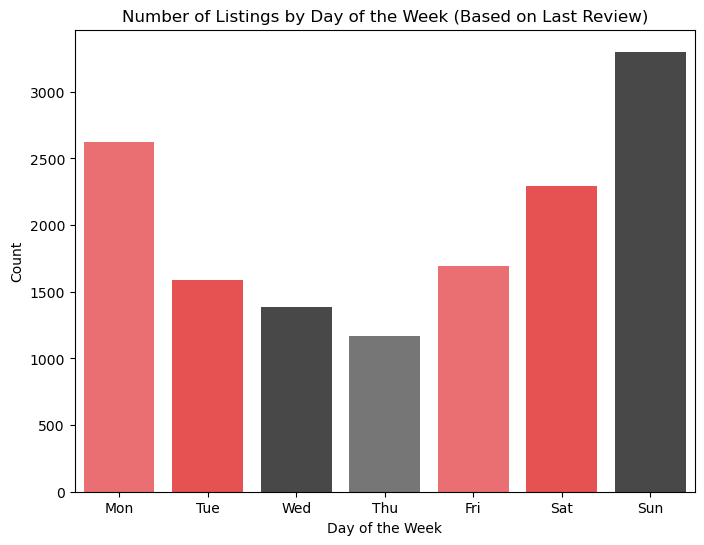

In [24]:
airbnb_colors = ['#FF5A5F', '#FF3839', '#484848', '#767676']

# Counts of listings by day of the week
plt.figure(figsize=(8, 6))
sns.countplot(x='day_of_week', data=listings_cleaned, palette=airbnb_colors)
plt.title('Number of Listings by Day of the Week (Based on Last Review)')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

**By extracting the year, month, and day of the week, one can understand how the listings' characteristics and availability change over different time periods. Based on the bar plots above, the number of ratings based on the "last_ review" column had a great impact in the year 2023, particularly in the month of March and on Sundays.This approach would provide a more accurate understanding of how prices may fluctuate based on the specific time of year, month, and even the day of the week, ultimately assisting in making informed pricing decisions**.

## Scaling Numeric Features

In [9]:
# Scale numeric features
numeric_features = listings_cleaned.select_dtypes(include='number')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

**Scaling the features ensures that they are on a similar scale, which can be beneficial for modeling**.

## Encoding categorical features

In [10]:
# Define categorical features
categorical_features = listings_cleaned[['room_type', 'property_type']]

**The columns "property_type" and "room_type" in the dataset have a limited number of distinct values that categorize the properties and rooms in the Airbnb listings. By encoding these categorical variables, the values can be represented numerically, enabling the models to understand and utilize the categorical information during the prediction process. Categorical encoding allows the models to learn from and make predictions based on these categorical features, ensuring compatibility between the data and the modeling algorithms**

In [11]:
categorical_features = listings_cleaned[['room_type', 'property_type', 'neighbourhood']]
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(categorical_features)

In [12]:
# Convert scaled features to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=numeric_features.columns)

In [13]:
# Encode categorical features
encoded_features = encoder.transform(categorical_features)
encoded_columns = encoder.get_feature_names_out(categorical_features.columns)

In [14]:
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoded_columns)

In [15]:
# Combine scaled and encoded features
combined_df = pd.concat([scaled_df, encoded_df], axis=1)

In [16]:
# Save the combined DataFrame as CSV
combined_df.to_csv('../data/scaled_encoded_data.csv', index=False)